This program will rotate a random 3D vector about the x and z axes.

In [21]:
import tensorflow as tf
import numpy as np

In [22]:
vector = tf.Variable(tf.random_normal((3,1), 0, 1), name = 'rv0') #Setting up random vector to rotate

In [23]:
random_angle1 = tf.Variable(tf.random_uniform((), 0 , 2*np.pi)) #Setting up angles of rotation
random_angle2 = tf.Variable(tf.random_uniform((), 0, 2*np.pi))

In [24]:
#Setting up matrices for the transformation intiating the rotation
z_rotation = [tf.cos(random_angle1), -tf.sin(random_angle1), 0, tf.sin(random_angle1), tf.cos(random_angle1), 0, 0, 0, 1]
x_rotation = [1, 0, 0, 0, tf.cos(random_angle2), -tf.sin(random_angle2), 0, tf.sin(random_angle2), tf.cos(random_angle2)]

In [25]:
z, x = tf.reshape(z_rotation, [3,3]), tf.reshape(x_rotation, [3,3]) #Reshaping into 3x3 matrices

In [26]:
new_vector_z1 = tf.matmul(z, vector) #Matrix transformation of vector via multiplication
new_vector_x1 = tf.matmul(x, vector)
new_vector_z2 = tf.matmul(z, new_vector_x1)
new_vector_x2 = tf.matmul(x, new_vector_z1)

In [27]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess: #Running the session
    sess.run(init)
    v = vector.eval() #The vector to be rotated
    w1 = sess.run(new_vector_x2) #The vector first rotated about z-axis, then x-axis
    w2 = sess.run(new_vector_z2) #The vector first rotated about x-axis, then z-axis

In [29]:
print("V:" + str(v))
print("W1: " + str(w1))
print("W2: " + str(w2))

V:[[ 2.11210322]
 [ 0.61152101]
 [ 0.99570471]]
W1: [[-1.02072513]
 [ 2.15220737]
 [ 0.39049935]]
W2: [[-1.27707934]
 [ 1.89536762]
 [ 0.77654117]]


In [30]:
np.linalg.norm(v), np.linalg.norm(w1), np.linalg.norm(w2)

(2.4137866, 2.4137866, 2.4137866)

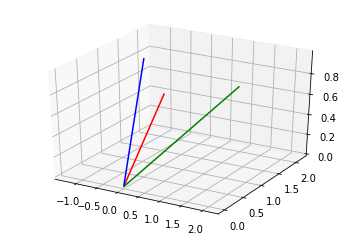

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

v_x,v_y,v_z = [0,v[0]], [0,v[1]], [0,v[2]]
ax.plot_wireframe(v_x,v_y,v_z, color = "green")
w1_x,w1_y,w1_z = [0,w1[0]], [0,w1[1]], [0,w1[2]]
ax.plot_wireframe(w1_x,w1_y,w1_z, color = "red")
w2_x,w2_y,w2_z = [0,w2[0]], [0,w2[1]], [0,w2[2]]
ax.plot_wireframe(w2_x,w2_y,w2_z, color = "blue")
plt.show()